In [1]:
#Import modules #Run this once

import numpy as np
import pandas as pd
import os.path
from pylab import *
import glob
import os
import re
from xlwt import Workbook
from scipy.optimize import curve_fit
global pointnumber
from numpy import sqrt, pi, exp, linspace, loadtxt
from lmfit import  Model, Parameter, Parameters
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!python read_trc.py
%run read_trc.py
!python autocorrelate.py
%run autocorrelate.py

In [3]:
def trc_plot(trc_file):
    x, y, d = readTrc(trc_file)
    x=x-min(x)
    avg=average(y)
    No_point = len(x)/10000;
    No_point = int(No_point)
    j=0
    x_avg = []; y_avg=[]
    for i in range(No_point):
        x_avg_temp = average(x[i*1000:1000*(i+1)])
        y_avg_temp = average(y[i*1000:1000*(i+1)])
        j += i
        x_avg = append(x_avg, x_avg_temp)
        y_avg = append(y_avg, y_avg_temp)
    fig, axes = plt.subplots(3,1, figsize=(10, 5))
    axes[0].plot(x,y)
    axes[1].plot(x_avg, y_avg, label=round(average(y_avg),3))
    axes[1].legend()
    G = autocorrelate(y_avg, deltat=4e-10,normalize=True)
    axes[2].plot(G[:,0], G[:,1])
    axes[2].set_xscale('log')
    return

You can get the files from:

//data02.physics.leidenuniv.nl/datalv/pi-orrit/shared/Oscilloscope

## Nanorod

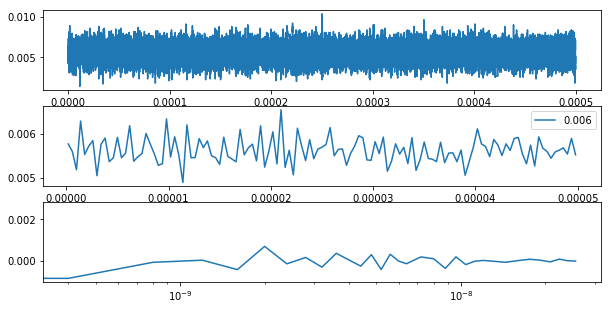

In [7]:
trc_nr = '/home/biswajit/Research/Reports_ppt/reports/UltraDLS/data/\
20170804_oscilloscope/C1eom-1Hz-l_4-pm-1V-00005.trc';
trc_plot(trc_file=trc_nr)

## Background

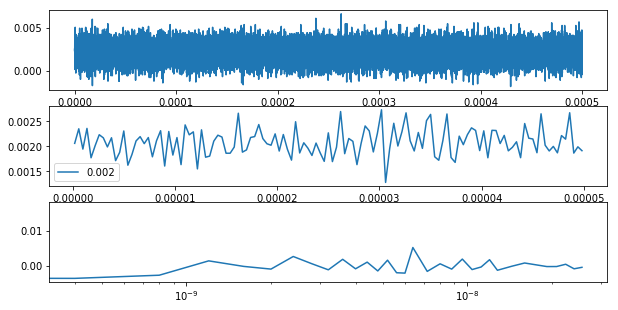

In [6]:
trc_bg = '/home/biswajit/Research/Reports_ppt/reports/UltraDLS/data/\
20170804_oscilloscope/C1eom-1Hz-l_4-pm-1V-background00005.trc';
trc_plot(trc_file=trc_bg)